 ### 목표
 - 버섯의 특징을 활용해 독/식용 버섯을 분류
 - Decision tree 시각화 & 과대적합 제어
 - 특성선택(Feature selection)해보기
 

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn import metrics

In [2]:
data = pd.read_csv('./data/mushroom.csv')

In [3]:
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.info()

#결측치 없음 !

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.keys()

Index(['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
# 문제와 정답 나누기
# 정답은 poisonous 
X = data.iloc[:,1:]  # 문제
y = data.iloc[:,0]   #정답  (행은 전부다 컬럼은 poisonous만 가져오기)

In [7]:
X = data.loc[:,'cap-shape':]
y = data.loc[:,'poisonous']

In [8]:
y.value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

In [9]:
# 범주형 특성이기 때문에 수치형으로 바꾸는 인코딩 필요
# label 인코딩(단순 수치값으로 매핑하는 작업)-> 크기성질을 학습해야할때 사용  과   one-hot 인코딩이 있음 ( 0하고 1로만 나누는) 
# 각자의 장단점이 있음


### 라벨인코딩

In [10]:
X['habitat'].unique()  #-> 우리가 인코딩해줘야할것들

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [11]:
h_dic = {
    'u' : 2,
    'g' : 1,
    'm' : 3,
    'd' : 5,
    'p' : 4,
    'w' : 6,
    'l' : 7
}

In [12]:
X['habitat'].map(h_dic)

0       2
1       1
2       3
3       2
4       1
       ..
8119    7
8120    7
8121    7
8122    7
8123    7
Name: habitat, Length: 8124, dtype: int64

### 원 핫 인코딩
- pandas에서 제공

In [13]:
X_one_hot = pd.get_dummies(X)
X_one_hot.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### 모델링

In [14]:
# 7: 3 나누기

#원래 X, y에  문제와 정답 데이터를 넣어놨으니 원래 저걸 그대로 넣으면됬는데 저건 글자데이터라
#인코딩으로 숫자 데이터로 바꾼걸 넣어줘야함

# 변수 순서 꼭 맞추기 !! 
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, # 문제 - 키값데이터
                                                    y, # 정답
                                                    test_size = 0.3, 
                                                    random_state=1   
                                                   )
                

In [15]:
#tree모델 객체생성
tree = DecisionTreeClassifier()

In [16]:
#트리의 최대 깊이 : max_depth 
#   (값이 클수록 모델의 복잡도가 올라간다.) # 값이 클수록 -> 질문이 많아진다 = 물어볼 특성이 많다.
#얘가 제일중요 - 얘가 제일 많이 질문을 억제함


# 리프 노드의 최대개수 : max_leaf_nodes
# 분할되기 위해 노드가 가져야하는 최소 샘플 개수 : min_samples_leaf
# 리프 노드가 되기 위한 최소 샘플의 개수 : min_samples_leaf

In [17]:
# 훈련 ( 훈련문제, 훈련정답)
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
# 트레인문제 예측
pre = tree.predict(X_test)

In [19]:
#예측 답이랑 실제답 비교
metrics.accuracy_score(pre,y_test)
# 같음   tree.score(X_test,y_test)

1.0

### 시각화 패키지 설치

In [20]:
!pip install graphviz

In [21]:
from sklearn.tree import export_graphviz

export_graphviz(tree,out_file='tree.dot',class_names=['식용','독'],
                feature_names = X_one_hot.columns,
                filled = True
               )

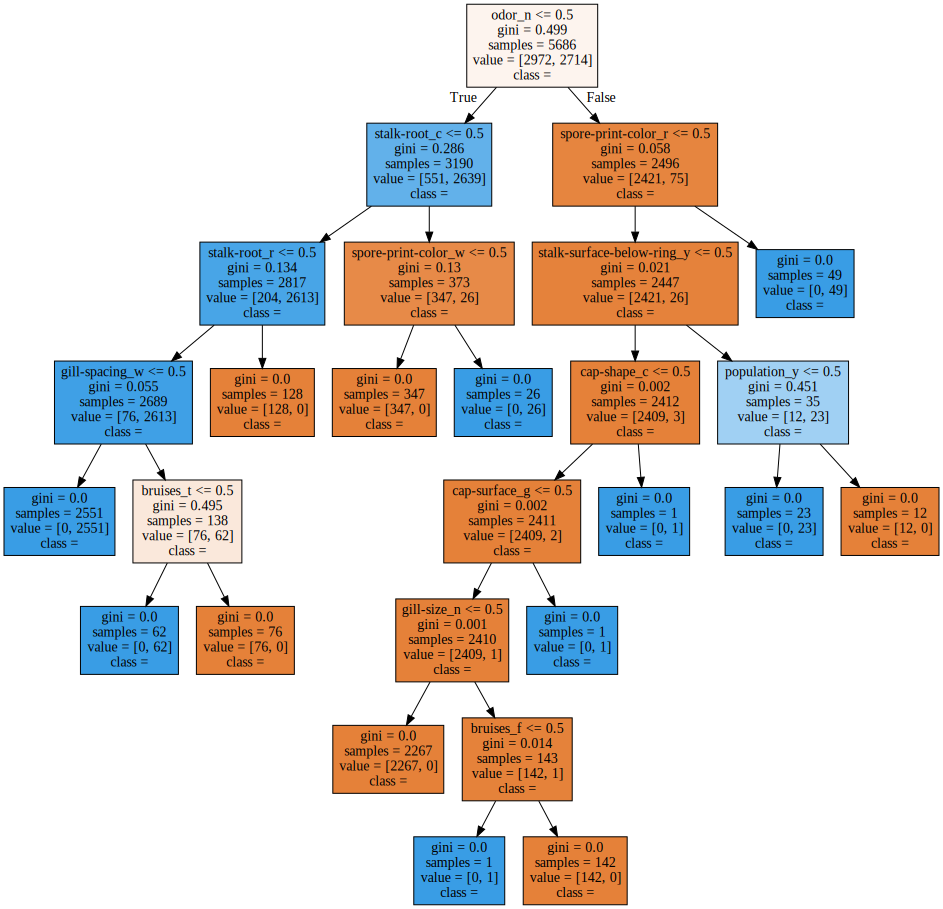

In [22]:
import graphviz

#오픈시킨 tree.dot의 이름을 f로 하겠다.
with open('tree.dot',encoding = 'UTF-8') as f:
    dot_graph =f.read()
    
display(graphviz.Source(dot_graph))
    


In [23]:
X_one_hot.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)